# Introduction to Python

In [1]:
import pandas as pd                 # importing pandas library

In [2]:
SM_camp = pd.read_excel('F:/Skillenable/Assignment 1 Python/Samaritan Marketing Campaign.xlsx')
SM_camp                             # import the data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Complain,Response
0,5524,1957,Graduation,Single,58138,0,0,2012-04-09 00:00:00,58,635,88,546,172,88,88,0,1
1,2174,1954,Graduation,Single,46344,1,1,2014-08-03 00:00:00,38,11,1,6,2,1,6,0,0
2,4141,1965,Graduation,Together,71613,0,0,21-08-2013,26,426,49,127,111,21,42,0,0
3,6182,1984,Graduation,Together,26646,1,0,2014-10-02 00:00:00,26,11,4,20,10,3,5,0,0
4,5324,1981,PhD,Married,58293,1,0,19-01-2014,94,173,43,118,46,27,15,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223,0,1,13-06-2013,46,709,43,182,42,118,247,0,0
2236,4001,1946,PhD,Together,64014,2,1,2014-10-06 00:00:00,56,406,0,30,0,0,8,0,0
2237,7270,1981,Graduation,Divorced,56981,0,0,25-01-2014,91,908,48,217,32,12,24,0,0
2238,8235,1956,Master,Together,69245,0,1,24-01-2014,8,428,30,214,80,30,61,0,0


## 1) Find  the  number  of  customers  who  accepted the offer in last campaign. 


In [3]:
fc1 = SM_camp['Response'] == 1                    # required condition
Cust_accept = SM_camp[fc1] .shape[0]              # on applying above condition; all the customers who accepted the offer in last campaign. 
Cust_accept

# OR

# Cust_accept = SM_camp[SM_camp['Response']== 1].shape[0]     

334

### Inference :
    There are total 334 customers who accepted the offer in last campaign of Samaritan Marketing Campaign
i.e
* 14.91% of 2240 customers accepted the offer in last campaign

##  2) Find the number of customers who complained in the last 2 year and spent more than 300 on wine. 



In [4]:
fc2 = SM_camp['Complain'] == 1
fc3 = SM_camp['MntWines'] > 300           # Required conditions

Cust_complain = SM_camp[fc2 & fc3]        # Applying conditions
Cust_complain.shape[0]                    # Calling the required filter data

5

### Inference:
     There are total 5 customers who complained in the last 2 year and spent more than 300 on wine.
i.e
* 0.223% of 2240 customers complained in the last 2 year and spent more than 300 on wine.

# 3) Find the number of customers who are either Single or born after 1983. 


In [5]:
fc4 = SM_camp['Marital_Status'] == "Single"  
fc5 = SM_camp['Year_Birth'] > 1983

cust_single1983 = SM_camp[fc4 | fc4].shape[0]
cust_single1983

480

### Inference:
       There are total 480 customers who are either Single or born after 1983. 
       i.e
       * 21.429% of 2240 customers are either Single or born after 1983.

# 4) Find the average Recency of customers based on their marital status.  


In [6]:
Recency_MStat = SM_camp.groupby('Marital_Status')[['Recency']].mean()      # By using groupby(), created the query to get Avg recency based on marital status
Recency_MStat

,Recency
Marital_Status,
Absurd,53.000000
Alone,30.333333
Divorced,49.487069
Married,48.277778
Single,49.506250
Together,50.106897
Widow,49.142857
YOLO,3.000000


# 5) Find the average Income based on customer’s education level. 


In [7]:
Income_ed = SM_camp.groupby('Education')[['Income']].mean()
Income_ed

,Income
Education,
2n Cycle,47668.167488
Basic,20306.259259
Graduation,52693.821650
Master,52878.108108
PhD,56082.090535


# 6) Find the total amount spent by customers on sweet based on the number of kids they have at home.


In [8]:
Spending_SweetKids = SM_camp.groupby('Kidhome')[['MntSweetProducts']].sum()   # used group()
Spending_SweetKids

,MntSweetProducts
Kidhome,
0,52365
1,8030
2,226


# 7) Find the total amount of spent by customers on gold based on their marital status. 


In [9]:
Spending_GoldM = SM_camp.groupby('Marital_Status')[['MntGoldProds']].sum()    # Used groupby()
Spending_GoldM

,MntGoldProds
Marital_Status,
Absurd,408
Alone,81
Divorced,10739
Married,36999
Single,20990
Together,24937
Widow,4371
YOLO,84


# 8) Get  the  weekday  name  from  the  date  of  customer joining. Find the average recency grouped by weekday name. 


In [10]:
SM_camp['Cust_date'] = pd.to_datetime(SM_camp['Dt_Customer'])

In [11]:
SM_camp['Day_joining'] = SM_camp['Cust_date'].dt.day_name()
SM_camp.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Complain,Response,Cust_date,Day_joining
0,5524,1957,Graduation,Single,58138,0,0,2012-04-09 00:00:00,58,635,88,546,172,88,88,0,1,2012-04-09,Monday
1,2174,1954,Graduation,Single,46344,1,1,2014-08-03 00:00:00,38,11,1,6,2,1,6,0,0,2014-08-03,Sunday
2,4141,1965,Graduation,Together,71613,0,0,21-08-2013,26,426,49,127,111,21,42,0,0,2013-08-21,Wednesday
3,6182,1984,Graduation,Together,26646,1,0,2014-10-02 00:00:00,26,11,4,20,10,3,5,0,0,2014-10-02,Thursday
4,5324,1981,PhD,Married,58293,1,0,19-01-2014,94,173,43,118,46,27,15,0,0,2014-01-19,Sunday


### Recesency 

In [12]:

recesency_weekdays = SM_camp.groupby('Day_joining')[['Recency']].mean()
recesency_weekdays

,Recency
Day_joining,
Friday,50.939297
Monday,46.201278
Saturday,50.161184
Sunday,50.383721
Thursday,48.119874
Tuesday,47.501587
Wednesday,50.305389


# 9)Get the month name from the date of customer joining. Find the total amount spend on meat based on the month of joining. 


In [13]:
SM_camp['Joining_month'] = SM_camp['Cust_date'].dt.month_name()
SM_camp

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Complain,Response,Cust_date,Day_joining,Joining_month
0,5524,1957,Graduation,Single,58138,0,0,2012-04-09 00:00:00,58,635,88,546,172,88,88,0,1,2012-04-09,Monday,April
1,2174,1954,Graduation,Single,46344,1,1,2014-08-03 00:00:00,38,11,1,6,2,1,6,0,0,2014-08-03,Sunday,August
2,4141,1965,Graduation,Together,71613,0,0,21-08-2013,26,426,49,127,111,21,42,0,0,2013-08-21,Wednesday,August
3,6182,1984,Graduation,Together,26646,1,0,2014-10-02 00:00:00,26,11,4,20,10,3,5,0,0,2014-10-02,Thursday,October
4,5324,1981,PhD,Married,58293,1,0,19-01-2014,94,173,43,118,46,27,15,0,0,2014-01-19,Sunday,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223,0,1,13-06-2013,46,709,43,182,42,118,247,0,0,2013-06-13,Thursday,June
2236,4001,1946,PhD,Together,64014,2,1,2014-10-06 00:00:00,56,406,0,30,0,0,8,0,0,2014-10-06,Monday,October
2237,7270,1981,Graduation,Divorced,56981,0,0,25-01-2014,91,908,48,217,32,12,24,0,0,2014-01-25,Saturday,January
2238,8235,1956,Master,Together,69245,0,1,24-01-2014,8,428,30,214,80,30,61,0,0,2014-01-24,Friday,January


### Amount spend according to month of joining 

In [14]:
Amount_meat = SM_camp.groupby('Joining_month')[['MntMeatProducts']].sum()
Amount_meat

,MntMeatProducts
Joining_month,
April,30724
August,35102
December,37247
February,32748
January,30557
July,19133
June,26937
March,27504
May,33288


In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# 10) Plot  a  histogram  for  the  customer  income  level. 


<AxesSubplot:xlabel='Income', ylabel='Count'>

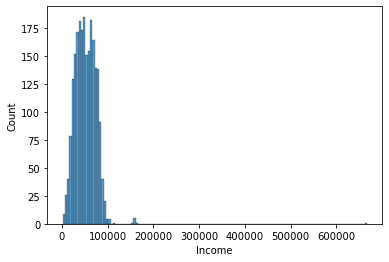

In [16]:
Income_hist = sns.histplot(SM_camp['Income'])
Income_hist

# 11) Plot a scatter plot between customer income and recency score. 


C:\Users\arun\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Income', ylabel='Recency'>

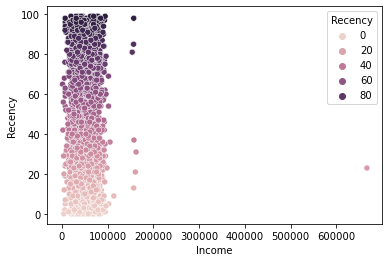

In [17]:
Scatter_inc_rec = sns.scatterplot(SM_camp['Income'], SM_camp['Recency'], hue = SM_camp['Recency'])
Scatter_inc_rec

# 12) Plot  a  bar  chart  between  the  number  of teenagers  in  home  and  the  average  amount spent on fish. 


In [18]:
# Recovering required data

data1 = SM_camp.groupby('Teenhome')[['MntFishProducts']].sum()
data1


,MntFishProducts
Teenhome,
0,56346
1,26468
2,1243


Text(0, 0.5, 'Spending_on_Fish')

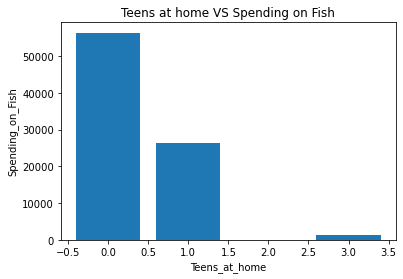

In [19]:
# creating new data using above result

Teens_at_home = [0, 1, 3]
Spending_on_Fish = [56346,26468,1243]
        

plt.bar(Teens_at_home, Spending_on_Fish)
plt.title('Teens at home VS Spending on Fish')
plt.xlabel('Teens_at_home')
plt.ylabel('Spending_on_Fish')